In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import matplotlib.gridspec as gridspec

In [18]:
# Data Loading and Preprocessing
df = pd.read_csv('project_1_with_extreme.csv', parse_dates=['time'])
df.set_index('time', inplace=True)

In [19]:
# Define parameters and events
numeric_cols = ['TREFMXAV_U', 'FLNS', 'FSNS', 'PRECT', 'PRSN', 'QBOT',
               'TREFHT', 'UBOT', 'VBOT', 'wind_speed']
events = ['heatwave', 'heavy_precipitation', 'strong_winds']
palette = {'Extreme': '#ff7f0e', 'Normal': '#1f77b4'}


Analyzing HEATWAVE:
[8.395186082289712e-158, 2.0209809843709327e-46, 1.7497193261592205e-94, 9.73880048580834e-60, 9.031008193062548e-27, 3.709312135818807e-48, 6.840840400458661e-138, 1.8423564428231136e-37, 6.16627204876463e-25, 4.6923317829312765e-20]


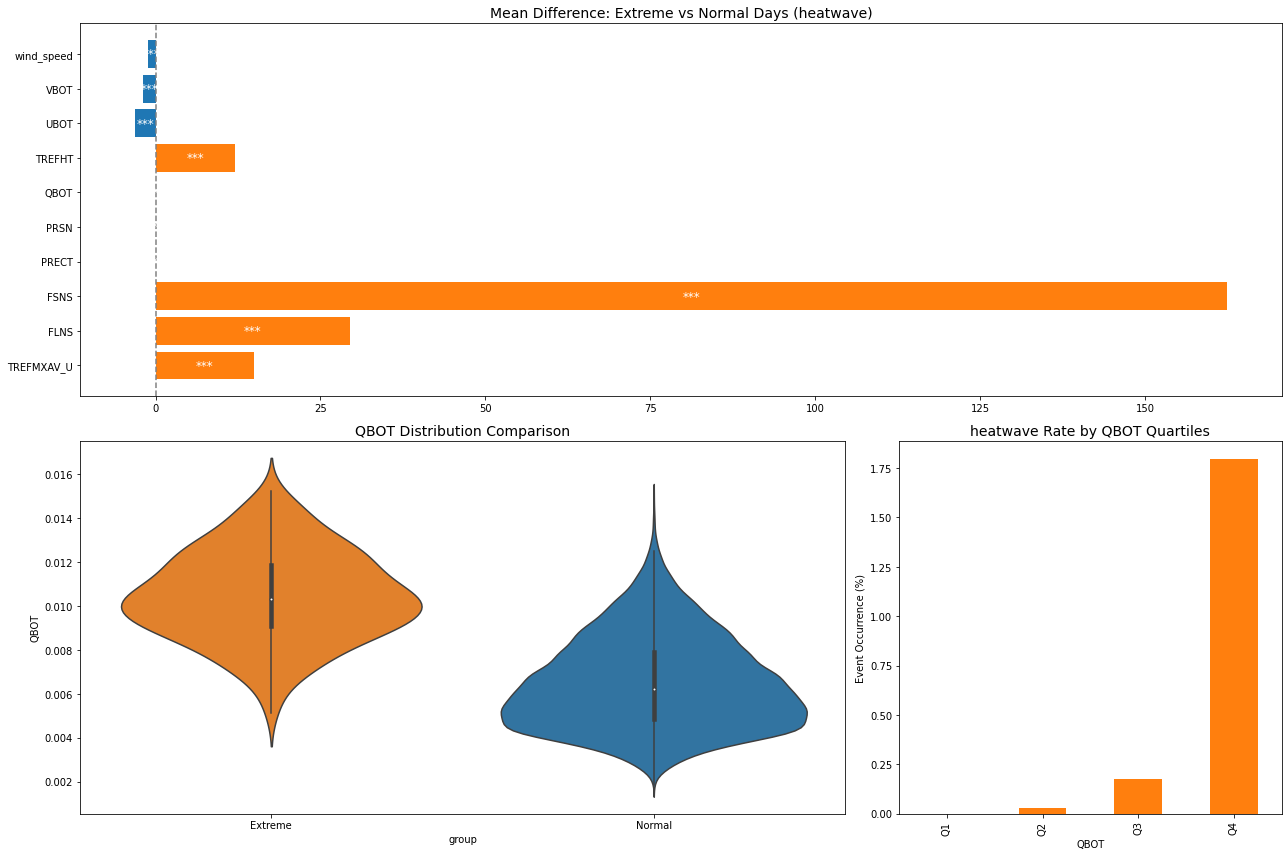

,Extreme_Mean,Normal_Mean,Mean_Diff,P_Value
TREFMXAV_U,303.6356,288.7617,14.8739,0.0
TREFHT,296.9068,284.8159,12.0909,0.0
FSNS,258.6109,96.2135,162.3974,0.0
PRECT,0.0000,0.0000,-0.0000,0.0
QBOT,0.0104,0.0065,0.0039,0.0
FLNS,72.2911,42.8483,29.4428,0.0
UBOT,-1.9641,1.1921,-3.1562,0.0
PRSN,0.0000,0.0000,-0.0000,0.0
VBOT,-0.3348,1.5123,-1.8471,0.0
wind_speed,3.0751,4.2655,-1.1904,0.0



Analyzing HEAVY_PRECIPITATION:
[0.8033261960644039, 1.397386244879283e-87, 8.266613343251692e-47, 3.54720659860125e-88, 0.08136769994217277, 6.563930188690332e-23, 0.01260889873958859, 2.892189187390784e-09, 0.07515069726907327, 0.1352066741175007]


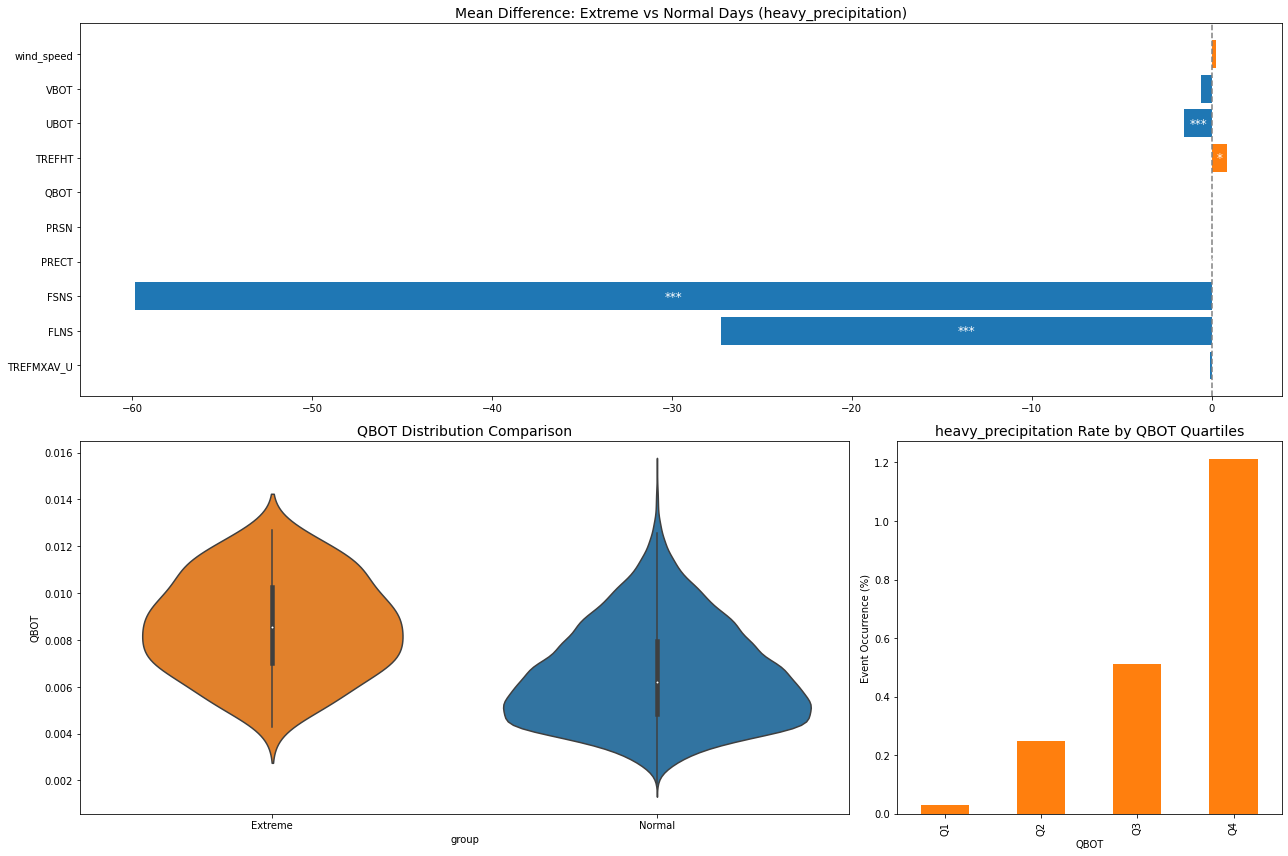

,Extreme_Mean,Normal_Mean,Mean_Diff,P_Value
PRECT,0.0000,0.0000,0.0000,0.0000
FLNS,15.8516,43.1322,-27.2806,0.0000
FSNS,37.4769,97.3258,-59.8488,0.0000
QBOT,0.0086,0.0065,0.0021,0.0000
UBOT,-0.3357,1.1839,-1.5196,0.0000
TREFHT,285.7149,284.8722,0.8427,0.0126
VBOT,0.8939,1.5061,-0.6123,0.0752
PRSN,0.0000,0.0000,0.0000,0.0814
wind_speed,4.5181,4.2583,0.2598,0.1352
TREFMXAV_U,288.7607,288.8366,-0.0759,0.8033



Analyzing STRONG_WINDS:
[2.263426548292531e-25, 3.975828663356298e-15, 9.24208489874247e-84, 4.0253316624144415e-14, 9.217600520941553e-27, 4.660899270054336e-09, 6.242250440304931e-11, 1.0735816569670002e-45, 3.5826522033643037e-71, 3.4290881069643595e-161]


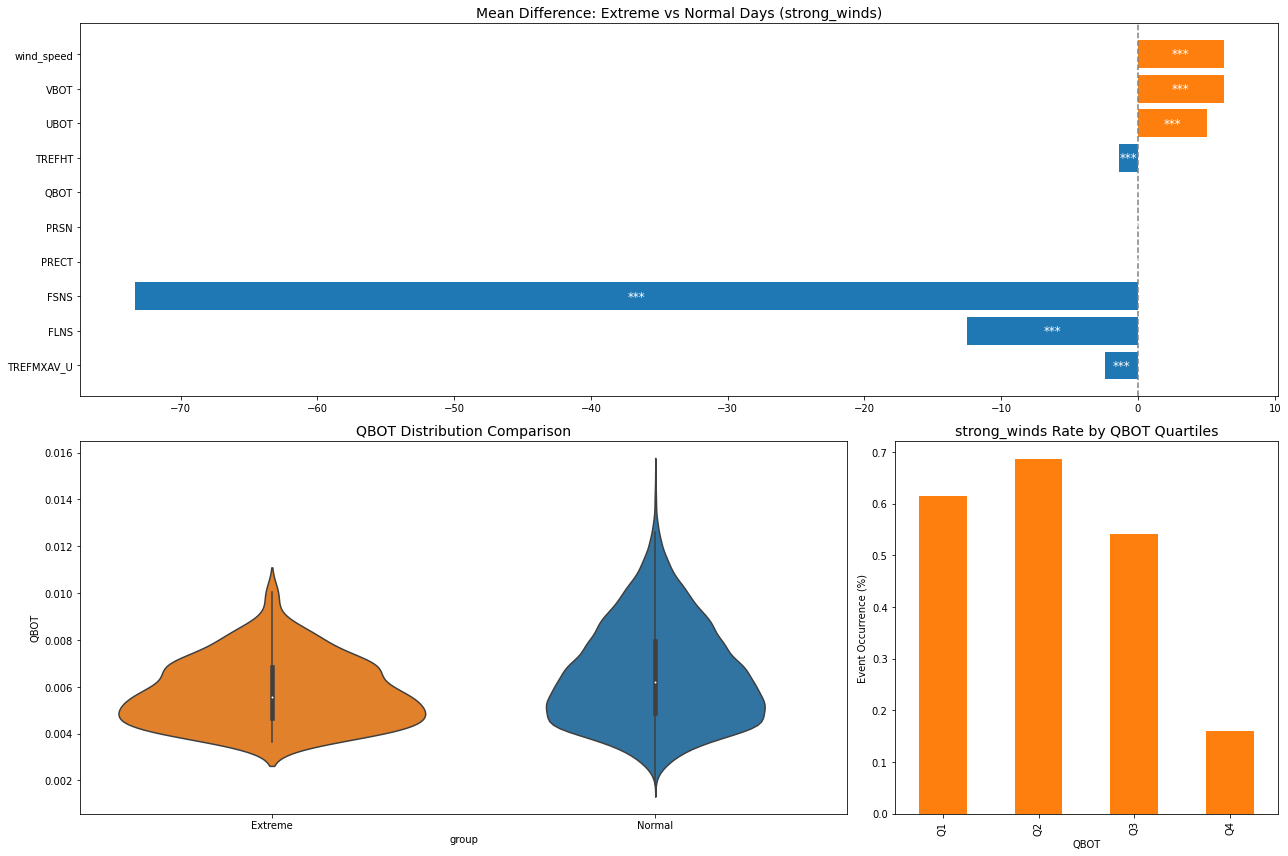

,Extreme_Mean,Normal_Mean,Mean_Diff,P_Value
wind_speed,10.5008,4.2282,6.2726,0.0
FSNS,24.0311,97.3934,-73.3623,0.0
VBOT,7.7418,1.4717,6.2701,0.0
UBOT,6.2269,1.1509,5.0760,0.0
PRSN,0.0000,0.0000,-0.0000,0.0
TREFMXAV_U,286.4178,288.8483,-2.4305,0.0
FLNS,30.5876,43.0581,-12.4705,0.0
PRECT,0.0000,0.0000,0.0000,0.0
TREFHT,283.4626,284.8835,-1.4210,0.0
QBOT,0.0058,0.0065,-0.0007,0.0


In [21]:
def analyze_extreme_event(event_name):
    # Data splitting
    extreme_days = df[df[event_name]]
    normal_days = df[~df[event_name]]
    
    # Create figure layout
    plt.figure(figsize=(18, 12))
    gs = gridspec.GridSpec(2, 2, width_ratios=[2, 1])
    
    # Plot 1: Mean comparison with significance markers
    ax1 = plt.subplot(gs[0, :])
    mean_diff = (extreme_days[numeric_cols].mean() - normal_days[numeric_cols].mean())
    p_values = [stats.ttest_ind(extreme_days[col], normal_days[col], equal_var=False)[1] 
                for col in numeric_cols]
    
    print(p_values)
    
    bars = ax1.barh(numeric_cols, mean_diff, color=np.where(mean_diff > 0, palette['Extreme'], palette['Normal']))
    for i, (p, bar) in enumerate(zip(p_values, bars)):
        # Determine significance stars
        if p < 0.001:
            stars = '***'
        elif p < 0.01:
            stars = '**'
        elif p < 0.05:
            stars = '*'
        else:
            continue
            
        ax1.text(bar.get_width()/2, 
                bar.get_y() + bar.get_height()/2, 
                stars, 
                ha='center', 
                va='center', 
                color='white', 
                fontsize=12)
    
    ax1.set_title(f'Mean Difference: Extreme vs Normal Days ({event_name})', fontsize=14)
    ax1.axvline(0, color='gray', linestyle='--')
    
    # Plot 2: Distribution comparison (example parameter)
    ax2 = plt.subplot(gs[1, 0])
    example_param = 'QBOT'  # Can be parameterized
    combined_data = pd.concat([
        extreme_days[[example_param]].assign(group='Extreme'),
        normal_days[[example_param]].assign(group='Normal')
    ])
    sns.violinplot(x='group', y=example_param, data=combined_data, 
                  palette=palette, ax=ax2)
    ax2.set_title(f'{example_param} Distribution Comparison', fontsize=14)
    
    # Plot 3: Event occurrence by parameter quartiles
    ax3 = plt.subplot(gs[1, 1])
    param_quartiles = pd.qcut(df['QBOT'], 4, labels=['Q1', 'Q2', 'Q3', 'Q4'])
    event_rate = df.groupby(param_quartiles)[event_name].mean() * 100
    event_rate.plot(kind='bar', color=palette['Extreme'], ax=ax3)
    ax3.set_title(f'{event_name} Rate by QBOT Quartiles', fontsize=14)
    ax3.set_ylabel('Event Occurrence (%)')
    
    plt.tight_layout()
    filename = f"{event_name}_mean_diff_QBOT_analysis.png"
    plt.savefig(filename, bbox_inches='tight', dpi=300)
    plt.show()
    
    # Return statistical results
    results = pd.DataFrame({
        'Extreme_Mean': extreme_days[numeric_cols].mean(),
        'Normal_Mean': normal_days[numeric_cols].mean(),
        'Mean_Diff': mean_diff,
        'P_Value': p_values
    })
    return results.sort_values('P_Value')

# Analyze all events
for event in events:
    print(f"\n{'='*40}\nAnalyzing {event.upper()}:\n{'='*40}")
    results = analyze_extreme_event(event)
    display(results.round(4))

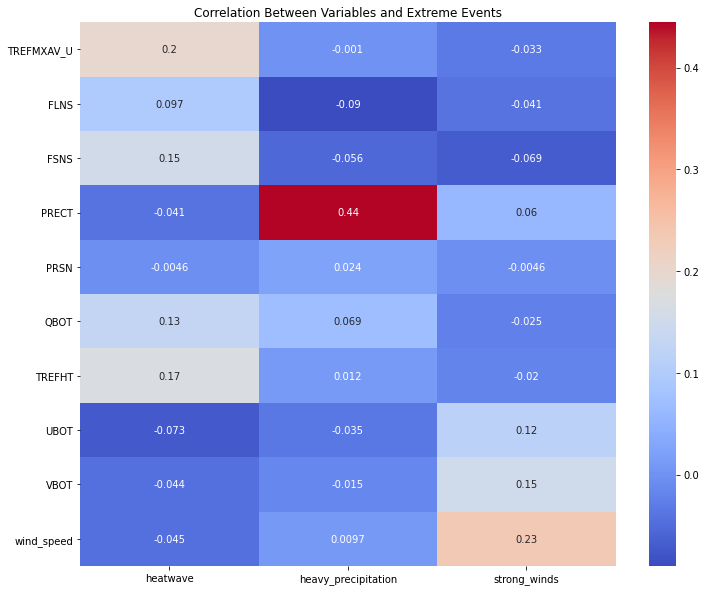

In [3]:
# Correlation Analysis
numeric_cols = ['TREFMXAV_U', 'FLNS', 'FSNS', 'PRECT', 'PRSN', 'QBOT', 
               'TREFHT', 'UBOT', 'VBOT', 'wind_speed']
events = ['heatwave', 'heavy_precipitation', 'strong_winds']

# Calculate correlation coefficients between variables and events
corr_matrix = df[numeric_cols + events].corr()

# Visualize correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix[events].drop(events), annot=True, cmap='coolwarm')
plt.title('Correlation Between Variables and Extreme Events')
plt.show()


--- HEATWAVE Analysis ---


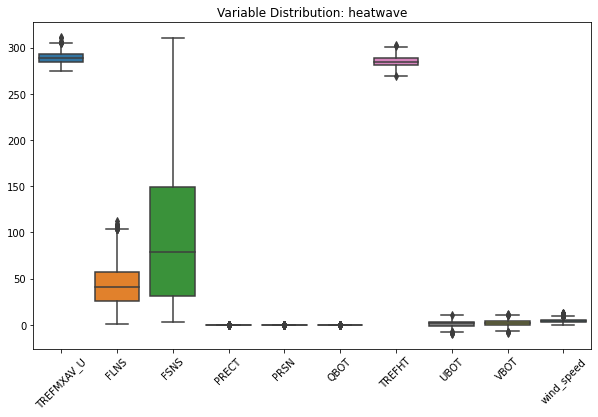

,t-statistic,p-value
TREFMXAV_U,123.584294,8.395186e-158
FLNS,21.708868,2.020981e-46
FSNS,52.185112,1.749719e-94
PRECT,-26.275679,9.738800e-60
PRSN,-10.722460,9.031008e-27
QBOT,22.608999,3.709312e-48
TREFHT,95.445368,6.840840e-138
UBOT,-17.712983,1.842356e-37
VBOT,-12.647213,6.166272e-25
wind_speed,-10.775101,4.692332e-20



--- HEAVY_PRECIPITATION Analysis ---


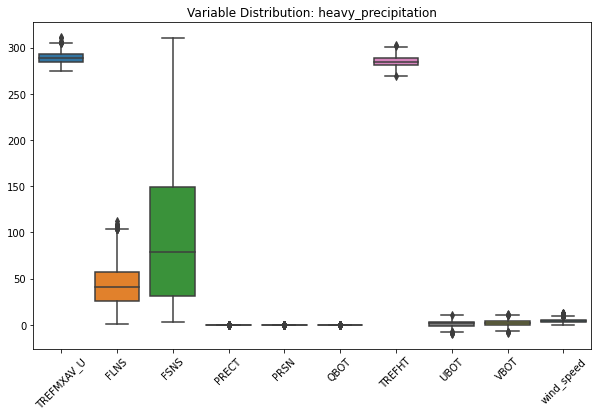

,t-statistic,p-value
TREFMXAV_U,-0.249521,8.033262e-01
FLNS,-44.257745,1.397386e-87
FSNS,-21.533302,8.266613e-47
PRECT,48.719303,3.547207e-88
PRSN,1.755811,8.136770e-02
QBOT,11.908516,6.563930e-23
TREFHT,2.527614,1.260890e-02
UBOT,-6.351646,2.892189e-09
VBOT,-1.793204,7.515070e-02
wind_speed,1.502731,1.352067e-01



--- STRONG_WINDS Analysis ---


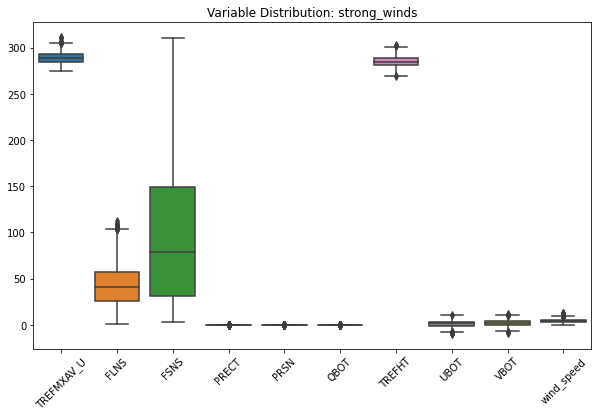

,t-statistic,p-value
TREFMXAV_U,-12.742267,2.263427e-25
FLNS,-8.837968,3.975829e-15
FSNS,-40.202296,9.242085e-84
PRECT,8.439934,4.025332e-14
PRSN,-10.720561,9.217601e-27
QBOT,-6.251613,4.660899e-09
TREFHT,-7.074497,6.242250e-11
UBOT,21.431968,1.073582e-45
VBOT,35.293750,3.582652e-71
wind_speed,135.229172,3.429088e-161


In [4]:
# Extreme vs Normal Days Comparison
def compare_extreme_days(event_col):
    extreme = df[df[event_col]]
    normal = df[~df[event_col]]
    
    # Create boxplot comparison
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=pd.concat([extreme[numeric_cols], normal[numeric_cols]], 
                            keys=['Extreme', 'Normal']))
    plt.xticks(rotation=45)
    plt.title(f'Variable Distribution: {event_col}')
    plt.show()
    
    # Perform t-tests between groups
    results = {}
    for col in numeric_cols:
        t_stat, p_val = stats.ttest_ind(extreme[col], normal[col], 
                                      equal_var=False)
        results[col] = {'t-statistic': t_stat, 'p-value': p_val}
    
    return pd.DataFrame(results).T

# Analyze each event type
for event in events:
    print(f"\n--- {event.upper()} Analysis ---")
    display(compare_extreme_days(event))

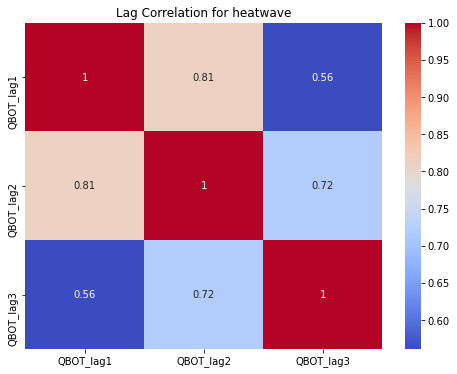

In [5]:
# Lag Effect Analysis
def analyze_lag_effects(target_event='heatwave', lag_days=3):
    lag_df = df.copy()
    # Create lag features (using QBOT as example)
    for i in range(1, lag_days+1):
        lag_df[f'QBOT_lag{i}'] = lag_df['QBOT'].shift(i)
    
    # Calculate lag correlations
    event_corr = lag_df[lag_df[target_event]][[f'QBOT_lag{i}' 
                        for i in range(1, lag_days+1)]].corr()
    
    # Visualize lag correlations
    plt.figure(figsize=(8, 6))
    sns.heatmap(event_corr, annot=True, cmap='coolwarm')
    plt.title(f'Lag Correlation for {target_event}')
    plt.show()

analyze_lag_effects('heatwave', 3)